In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## 图像的基础操作

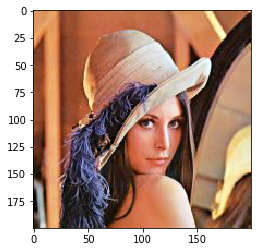

In [2]:
img = cv2.imread('./image/lenna.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)

1. 获取并修改像素值

In [3]:
#img.shape  #(600,600,3)
px = img[100,100]    #获取像素值
print(px)
blue = img[100,100,0]  #0通道像素值
print(blue)

#修改像素值
img[100,100] = [5,50,255]
print(img[100,100])


#numpy处理像素
print(img.item(100,100,0))   # 获取像素   返回值 = 图像.item(位置参数)
img.itemset((100,100,0),150)  #修改像素值
print(img.item(100,100,0))

[109  54  23]
109
[  5  50 255]
5
150


2. 获取图像属性

In [4]:
print(img.shape)   # (200, 200, 3)
print(img.size)    # 120000  像素数目
print(img.dtype)   # uint8  数据类型

(200, 200, 3)
120000
uint8


3. 图像ROI   
感兴趣区域

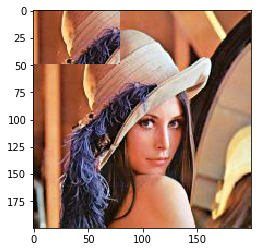

In [5]:
heart_roi = img[50:100,20:100]  #选择区域
img[0:50,0:80] = heart_roi  # 复制到其他区域
plt.imshow(img)

4. 拆分与合并图像通道

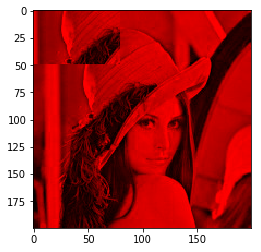

In [6]:
r,g,b = cv2.split(img)   #拆分  比较耗时
zeros = np.zeros(img.shape[:2], dtype = "uint8")
img1 = cv2.merge([r,zeros,zeros])  #合并
plt.imshow(img1)

#或者
r = img[:,:,0]

img[:,:,2] = 0  # 某通道赋值

5. 图像扩边(填充)      
cv2.copyMakeBorder()   
参数：  
rc输入图像   
top, bottom, left, right对应边界的像素数目。   
borderType要添加那种类型的边界     
value边界颜色，如果边界的类型是cv2.BORDER_CONSTANT   

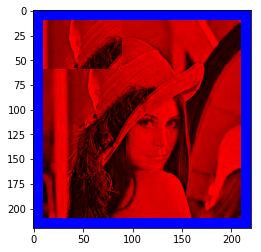

In [7]:
BLUE = [0,0,255]
constant= cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_CONSTANT,value=BLUE)
plt.imshow(constant)

## 图像上的算术运算    
cv2.add()，   
cv2.addWeighted()

In [ ]:
#加法  尽量使用opencv函数  例:
#cv2.add()将两幅图像进行加法运算，当然也可以直接使用numpy，res=img1+img。两幅图像的大小，类型必须一致，或者第二个图像可以使一个简单的标量值。
x = np.uint8([250])
y = np.uint8([10]) 
print(cv2.add(x,y))   # 250+10 = 260 => 255
print(x+y)          # 250+10 = 260 % 256 = 4


# 图像混合   g(x) = a*f(x) + (1-a)*h(x)   a->(0-1)
img1=cv2.imread('./image/lenna.jpg')
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img2=cv2.imread('./image/lenna_gray.jpg')
dst=cv2.addWeighted(img1,0.7,img2,0.3,0)   # alpha*img1 + beta*img2 + gamma
plt.imshow(dst)
plt.show()

#按位运算  AND OR NOT XOR
# https://blog.csdn.net/weixin_35732969/article/details/83748054
# 加载图像
img1 = cv2.imread('roi.jpg')
img2 = cv2.imread('opencv_logo.png')

# I want to put logo on top-left corner, So I create a ROI
rows,cols ,c= img2.shape
roi = img1[0:rows, 0:cols ]

# Now create a mask of logo and create its inverse mask also
img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(img2gray, 175, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)

# Now black-out the area of logo in ROI
# 取roi 中与mask 中不为零的值对应的像素的值，其他值为0
# 注意这里必须有mask=mask 或者mask=mask_inv, 其中的mask= 不能忽略
img1_bg = cv2.bitwise_and(roi,roi,mask = mask)

# 取roi 中与mask_inv 中不为零的值对应的像素的值，其他值为0。
# Take only region of logo from logo image.
img2_fg = cv2.bitwise_and(img2,img2,mask = mask_inv)

# Put logo in ROI and modify the main image
dst = cv2.add(img1_bg,img2_fg)
img1[0:rows, 0:cols ] = dst
cv2.imshow('res',img1)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 性能检测及优化

In [9]:
#检测程序效率   也可使用time模块
img1 = cv2.imread('./image/lenna.jpg')
e1 = cv2.getTickCount()    #获取时钟数
for i in range(5,49,2):
    img1 = cv2.medianBlur(img1,i)
e2 = cv2.getTickCount()
t = (e2 - e1)/cv2.getTickFrequency()   #获取时钟频率
print (t)


0.4509273282773409


In [10]:
cv2.useOptimized()    #查看优化是否开启

True

In [11]:
cv2.setUseOptimized(True)   #开启优化
%timeit res = cv2.medianBlur(img1,49)   
cv2.useOptimized()

38.4 ms ± 2.55 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


True

In [12]:
cv2.setUseOptimized(False)
cv2.useOptimized()

False

In [13]:
%timeit res = cv2.medianBlur(img1,49) 

14.7 ms ± 60.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [14]:
%timeit z = np.count_nonzero(img1[:,:,2])  # numpy统计

140 µs ± 694 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [15]:
%timeit z = cv2.countNonZero(img1[:,:,2])  #opencv统计

70.7 µs ± 523 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
